In [15]:
library(dplyr)

In [2]:
#### Polygenic risk scores
## rank pvalues (below a threshold T)
## from second most significant, 1Mb from previous, LD < 0.1
## exclude HLA

In [1]:
PRS_folder = "/hps/nobackup/hipsci/scratch/genotypes/imputed/Merged_2018-01/GeneticRiskScores/Risks_TT/"

In [2]:
sample_filename = paste0(PRS_folder,"TT/Individuals.txt")
sample = read.table(sample_filename)

In [3]:
### to search for traits (in PRS folder)
## zcat rawScoreMatrix.txt.gz | cut -f 1-3 | grep euro
### to get these (in PRS folder)
## zcat rawScoreMatrix.txt.gz | grep eurotic > /hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/PRS/neuroticism_PRS.txt

In [4]:
myfolder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/PRS/"

In [5]:
list.files(myfolder)

[1] "AD_2013_PRS.txt"                     "ADHD_PGC_2013_PRS.txt"              
 [3] "autism_2015_PRS.txt"                 "autism_PGC_2013_PRS.txt"            
 [5] "BP_2011_PRS.txt"                     "BP_2013_PRS.txt"                    
 [7] "BP_PGC_2013_PRS.txt"                 "BP_plus_schizophrenia_2013_PRS.txt" 
 [9] "BP_vs_schizophrenia_2013_PRS.txt"    "childIQ_2014_PRS.txt"               
[11] "collegecompletion_2013_PRS.txt"      "depressive_symptoms_2016_PRS.txt"   
[13] "educational_attainment_2016_PRS.txt" "major_depression_2016_PRS.txt"      
[15] "MDD_2013_PRS.txt"                    "MDD_2015_PRS.txt"                   
[17] "MDD_PGC_2013_PRS.txt"                "neo_neuroticism_2012_PRS.txt"       
[19] "neuroticism_2014_PRS.txt"            "neuroticism_2016_PRS.txt"           
[21] "PD_PRS.txt"                          "Schizophrenia_2011_PRS.txt"         
[23] "Schizophrenia_2013_1_PRS.txt"        "Schizophrenia_2013_2_PRS.txt"       
[25] "Schizophrenia_2014_PRS.txt"          "Schizophrenia_PGC_2013_PRS.txt"     
[27] "schoolyears_2013_PRS.txt"

In [6]:
##################################################
#### cellular phenoypes

In [7]:
## cell type proportion

In [8]:
## D52

In [9]:
file_prefix = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
file_suffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions_pivoted.tsv"

In [10]:
celltypes = read.table(paste0(file_prefix, file_suffix), header = T)
head(celltypes,2)

donor_id,pool_id,time_point,treatment,Astro,CHem,DA,Epen1,Epen2,FPP,P_FPP,P_Sert,Sert,unknown
HPSI0114i-bezi_3,pool10,D52,NONE,0.009174312,0.022935780,0.3027523,0.1788991,0,0.1422018,0.01834862,0.01376147,0.3119266,0
HPSI0114i-bezi_3,pool10,D52,ROT,0.022857143,0.005714286,0.2114286,0.2285714,0,0.1885714,0.00000000,0.01142857,0.3314286,0


In [11]:
donors = unique(celltypes$donor_id)

In [16]:
D52_celltypes = celltypes %>% group_by(donor_id) %>% summarise(mean_DA = mean(DA),
                                                               mean_Sert = mean(Sert),
                                                               mean_Epen1 = mean(Epen1),
                                                               mean_Astro = mean(Astro),
                                                              mean_neuro = mean(DA+Sert))

In [17]:
D52_noROT_celltypes = celltypes[celltypes$treatment == "NONE",] %>% group_by(donor_id) %>% summarise(mean_DA = mean(DA),
                                                                                          mean_Sert = mean(Sert),
                                                                                          mean_Epen1 = mean(Epen1),
                                                                                          mean_Astro = mean(Astro),
                                                                                          mean_neuro = mean(DA+Sert))

In [18]:
D52_ROT_celltypes = celltypes[celltypes$treatment == "ROT",] %>% group_by(donor_id) %>% summarise(mean_DA = mean(DA),
                                                                                          mean_Sert = mean(Sert),
                                                                                          mean_Epen1 = mean(Epen1),
                                                                                          mean_Astro = mean(Astro),
                                                                                          mean_neuro = mean(DA+Sert))

In [19]:
df_rot = inner_join(D52_ROT_celltypes,D52_noROT_celltypes,by="donor_id",suffix=c(".ROT",".noROT"))
head(df_rot,2)

donor_id,mean_DA.ROT,mean_Sert.ROT,mean_Epen1.ROT,mean_Astro.ROT,mean_neuro.ROT,mean_DA.noROT,mean_Sert.noROT,mean_Epen1.noROT,mean_Astro.noROT,mean_neuro.noROT
HPSI0114i-bezi_3,0.211428571,0.33142857,0.2285714,0.02285714,0.542857143,0.30275229,0.311926606,0.1788991,0.009174312,0.6146789
HPSI0114i-eipl_1,0.004646035,0.00346484,0.1552878,0.56114655,0.008110875,0.01427924,0.003173164,0.1217135,0.464717437,0.0174524


In [20]:
df_rot$diff_DA <- df_rot$mean_DA.noROT - df_rot$mean_DA.ROT 
df_rot$diff_Sert <- df_rot$mean_Sert.noROT - df_rot$mean_Sert.ROT 
df_rot$diff_Epen1 <- df_rot$mean_Epen1.noROT - df_rot$mean_Epen1.ROT 
df_rot$diff_Astro <- df_rot$mean_Astro.noROT - df_rot$mean_Astro.ROT 
head(df_rot,2)

donor_id,mean_DA.ROT,mean_Sert.ROT,mean_Epen1.ROT,mean_Astro.ROT,mean_neuro.ROT,mean_DA.noROT,mean_Sert.noROT,mean_Epen1.noROT,mean_Astro.noROT,mean_neuro.noROT,diff_DA,diff_Sert,diff_Epen1,diff_Astro
HPSI0114i-bezi_3,0.211428571,0.33142857,0.2285714,0.02285714,0.542857143,0.30275229,0.311926606,0.1788991,0.009174312,0.6146789,0.091323722,-0.0195019659,-0.04967235,-0.01368283
HPSI0114i-eipl_1,0.004646035,0.00346484,0.1552878,0.56114655,0.008110875,0.01427924,0.003173164,0.1217135,0.464717437,0.0174524,0.009633203,-0.0002916757,-0.03357431,-0.09642911


In [21]:
# library(dplyr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [22]:
cell_pheno = D52_celltypes
# cell_pheno = D52_ROT_celltypes
# cell_pheno = D52_noROT_celltypes
# cell_pheno = df_rot
head(cell_pheno,2)

donor_id,mean_DA,mean_Sert,mean_Epen1,mean_Astro,mean_neuro
HPSI0114i-bezi_3,0.257090433,0.321677588,0.2037353,0.01601573,0.57876802
HPSI0114i-eipl_1,0.009462637,0.003319002,0.1385007,0.51293199,0.01278164


In [23]:
myfiles = list.files(myfolder)
### given a set of files
for (i in 1:length(myfiles)){
    mysuffix = myfiles[i]
    myfilename = paste0(myfolder, mysuffix)
    myfile = read.table(myfilename, row.names = 1)
    # open file
    colnames(myfile) <- sample$V1
    # subselect to donors (this will depend on the neuro phenotype)
    myfile_sub = myfile[,donors]
    ## extract polygenic risk scores at different threholds
    df0 = data.frame(donor_id = colnames(myfile_sub), 
                     PRS0.01 = t(myfile_sub)[,grep("P0.01", rownames(myfile_sub))],
                     PRS0.001 = t(myfile_sub)[,grep("P0.001", rownames(myfile_sub))],
                     PRS1.e4 = t(myfile_sub)[,grep("P1.0E-4", rownames(myfile_sub))],
                     PRS1.e5 = t(myfile_sub)[,grep("P1.0E-5", rownames(myfile_sub))],
                     PRS5.e8 = t(myfile_sub)[,grep("P5.0E-8", rownames(myfile_sub))])
#     print(head(df0,2))         
    ## average % of DA neurons at D52, non-treated (no ROT) cells only
    df1 = cell_pheno
    ## inner join
    df = inner_join(df0,df1, by = "donor_id")
    # define cell trait of interest
    cell_trait = df$mean_neuro
#     cell_trait = df$mean_Sert
#     cell_trait = df$diff_DA
    # calculate correlations with PRS
    corrs = c(cor(cell_trait,df$PRS0.01),cor(cell_trait,df$PRS0.001),cor(cell_trait,df$PRS1.e4),
           cor(cell_trait,df$PRS1.e5),cor(cell_trait,df$PRS5.e8))
    corrs[is.na(corrs)] <- 0
    if (any(corrs>0.1)){
        print(i)
        print(paste0("trait: ",mysuffix))
        print(corrs)
    } 
}

Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `donor_id` joining factors with differe

ERROR: Error in names(x) <- value: 'names' attribute [2533] must be the same length as the vector [1953]


Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

[1] "trait: depressive_symptoms_2016_PRS.txt"
[1] NA NA NA NA NA


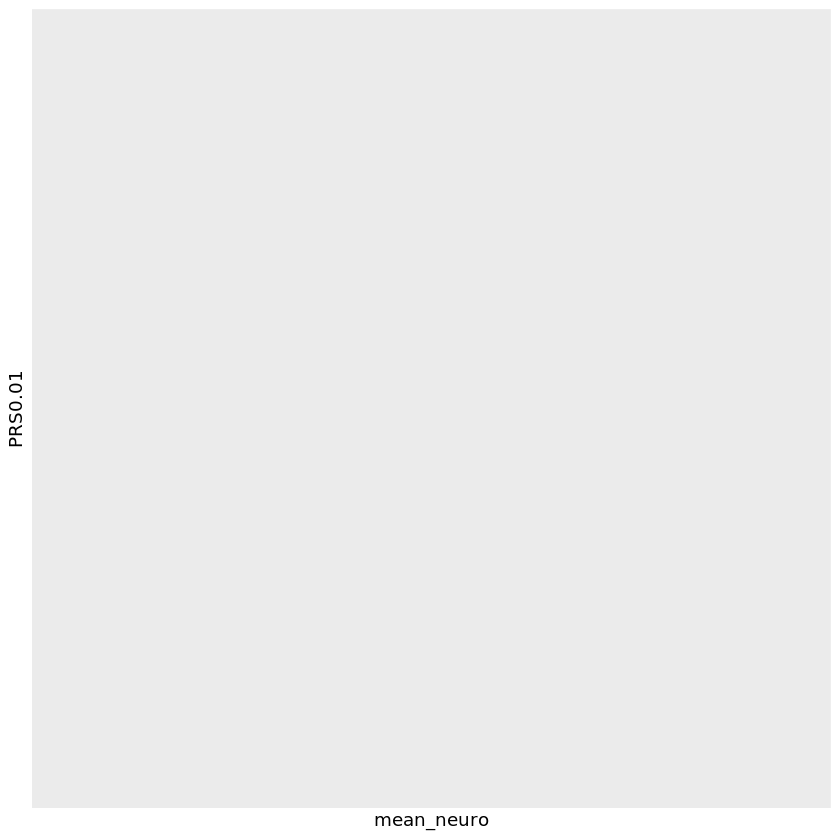

In [25]:
myfiles = list.files(myfolder)
# i = 10
i = 12
# i = 18
# i = 19
# i = 20
mysuffix = myfiles[i]
myfilename = paste0(myfolder, mysuffix)
myfile = read.table(myfilename, row.names = 1)
# open file
colnames(myfile) <- sample$V1
# subselect to donors (this will depend on the neuro phenotype)
myfile_sub = myfile[,donors]
## extract polygenic risk scores at different threholds
df0 = data.frame(donor_id = colnames(myfile_sub), 
                 PRS0.01 = t(myfile_sub)[,grep("P0.01", rownames(myfile_sub))],
                 PRS0.001 = t(myfile_sub)[,grep("P0.001", rownames(myfile_sub))],
                 PRS1.e4 = t(myfile_sub)[,grep("P1.0E-4", rownames(myfile_sub))],
                 PRS1.e5 = t(myfile_sub)[,grep("P1.0E-5", rownames(myfile_sub))],
                 PRS5.e8 = t(myfile_sub)[,grep("P5.0E-8", rownames(myfile_sub))])
#     print(head(df0,2))         
## average % of DA neurons at D52, non-treated (no ROT) cells only
df1 = cell_pheno
## inner join
df = inner_join(df0,df1, by = "donor_id")
print(paste0("trait: ",mysuffix))
cell_trait = df$mean_neuro
print(c(cor(cell_trait,df$PRS0.01),cor(cell_trait,df$PRS0.001),cor(cell_trait,df$PRS1.e4),
           cor(cell_trait,df$PRS1.e5),cor(cell_trait,df$PRS5.e8)))
ggplot(df, aes(x = mean_neuro, y = PRS0.01)) + geom_point() + geom_smooth(method='loess')

In [10]:
mysuffix = "educational_attainment_2016_PRS.txt"
mysuffix = "AD_PRS.txt"
mysuffix = "ADHD_PRS.txt"
myfilename = paste0(myfolder, mysuffix)

In [11]:
myfile = read.table(myfilename, row.names = 1)

In [12]:
ncol(myfile)

[1] 2533

In [13]:
sample_filename = paste0(PRS_folder,"TT/Individuals.txt")
sample = read.table(sample_filename)

In [14]:
nrow(sample)

[1] 2533

In [15]:
colnames(myfile) <- sample$V1
head(myfile)

,55108,55111,55117,55118,55120,55122,55133,55136,55138,55142,⋯,HPSI0416i-eapo_2,HPSI0616i-duve_6,HPSI0616pf-bury,HPSI0516i-peoo_1,HPSI0416pf-eapo,HPSI0616i-mifg_5,HPSI0516pf-eosr,HPSI0616pf-xuvy,HPSI0416pf-cihd,HPSI0616i-mifg_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P0.001,-2.8251053,1.30430701,-1.3033526,-2.3322488,-0.6363471,-2.956105,-3.277215,-2.26020325,-0.2464889,0.2637935,⋯,0.09458728,-3.30386683,-3.9129598,-3.0008705,-0.8502026,-2.9513879,-2.5573759,-1.56565286,-2.224088,-2.5381521
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P1.0E-5,-0.3729591,0.03068191,-0.1864796,-0.1864796,-0.3729591,0.000000,0.000000,0.03068191,0.4343230,-0.3729591,⋯,0.00000000,0.03068191,0.0000000,0.0000000,0.0000000,0.0000000,-0.1864796,0.03068191,0.000000,0.0000000
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P1.0E-4,-0.7362979,-0.22137017,-0.4363159,-0.4777755,0.4209917,-1.945538,-1.478170,-1.55449246,-0.6465172,-1.8555498,⋯,-1.37803149,0.07938233,-0.8320363,-0.2354424,-1.3780315,-0.9026383,-1.6566464,-1.76416006,-1.717374,-0.9026383
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P5.0E-8,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.00000000,0.0000000,0.0000000,⋯,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.000000,0.0000000
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P0.01,-13.4850583,2.16300563,0.2464115,-7.8470431,-1.4900061,-16.640288,-25.226055,-13.75435122,-3.5210254,-12.4642670,⋯,-0.65662071,-12.81722682,-7.9273316,-7.4464775,-0.4288328,-11.4218651,-5.9918634,-7.77732005,-9.424045,-10.4046559


In [16]:
##################################################
## cell type proportions

In [ ]:
### to do 
# possibly also loop over different phenotypes / cell type proportions

In [17]:
file_prefix = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
file_suffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions_pivoted.tsv"

In [18]:
celltypes = read.table(paste0(file_prefix, file_suffix), header = T)
head(celltypes)

donor_id,pool_id,time_point,treatment,Astro,CHem,DA,Epen1,Epen2,FPP,P_FPP,P_Sert,Sert,unknown
HPSI0114i-bezi_3,pool10,D52,NONE,0.009174312,0.022935780,0.302752294,0.1788991,0.000000000,0.1422018,0.01834862,1.376147e-02,0.311926606,0.000000000
HPSI0114i-bezi_3,pool10,D52,ROT,0.022857143,0.005714286,0.211428571,0.2285714,0.000000000,0.1885714,0.00000000,1.142857e-02,0.331428571,0.000000000
HPSI0114i-eipl_1,pool1,D52,NONE,0.464717437,0.162813539,0.014279238,0.1217135,0.002342097,0.1400725,0.08620429,3.022061e-04,0.003173164,0.004381989
HPSI0114i-eipl_1,pool1,D52,ROT,0.561146547,0.015040554,0.004646035,0.1552878,0.003858572,0.1764706,0.07291913,7.874636e-05,0.003464840,0.007087172
HPSI0114i-fikt_3,pool14,D52,NONE,0.076923077,0.000000000,0.222222222,0.2735043,0.008547009,0.1367521,0.01709402,0.000000e+00,0.222222222,0.042735043
HPSI0114i-fikt_3,pool14,D52,ROT,0.144578313,0.024096386,0.246987952,0.1807229,0.018072289,0.1867470,0.02409639,0.000000e+00,0.126506024,0.048192771


In [19]:
donors = unique(celltypes$donor_id)

In [20]:
head(donors)
length(donors)

[1] "HPSI0114i-bezi_3" "HPSI0114i-eipl_1" "HPSI0114i-fikt_3" "HPSI0114i-kolf_2"
[5] "HPSI0114i-lexy_2" "HPSI0114i-posc_1"

[1] 199

In [21]:
myfile_sub = myfile[,donors]

In [22]:
ncol(myfile_sub)
head(myfile_sub)

[1] 199

,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-fikt_3,HPSI0114i-kolf_2,HPSI0114i-lexy_2,HPSI0114i-posc_1,HPSI0114i-rozh_4,HPSI0114i-vass_1,HPSI0114i-wegi_1,HPSI0114i-zapk_2,⋯,HPSI1113i-podx_1,HPSI1113i-qolg_1,HPSI1113i-qorq_1,HPSI1113i-uofv_1,HPSI1113i-vuud_2,HPSI1114i-kuul_1,HPSI1114i-ualf_6,HPSI1114i-zuuy_4,HPSI1213i-hehd_1,HPSI1213i-tolg_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P0.001,-4.228765,0.3862102,-5.31534244,-3.70349193,0.63791607,1.8262225,-0.2380541,-0.2768025,-2.991997,-2.2528866,⋯,3.31437004,-0.6947093,-2.3179583,1.2949373,-3.37710154,1.4148477,0.56879639,0.2203028,-1.21521234,0.04116011
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P1.0E-5,0.000000,-0.1864796,0.03068191,0.03068191,0.03068191,-0.1557977,-0.1864796,-0.1864796,0.000000,0.2171615,⋯,0.03068191,0.0000000,-0.1864796,-0.1557977,0.03068191,-0.1864796,0.21716148,-0.1864796,0.03068191,-0.37295913
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P1.0E-4,-1.813127,-1.0031063,-1.15427877,-1.30464956,-1.97332704,-1.1462910,-1.2794452,-0.7743409,-1.156067,0.2017598,⋯,-1.17840938,-1.3357857,-1.3610904,-1.9669905,-0.78125286,-0.9260498,0.05418174,-0.4056707,-0.72249073,-1.04306140
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P5.0E-8,0.000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,⋯,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000
PGCcross_Attention_deficit_hyperactivity_disorder_2013_23453885_hg18_hg19.txt.gz_P0.01,-12.317191,0.7387267,-9.38747044,-9.01941415,0.55918565,0.3180404,-2.7958561,-6.3055559,-3.293368,-5.9581493,⋯,5.96600091,-3.9691465,-4.0750346,-11.5651997,-8.57089912,1.6789518,-3.63487468,-7.2607310,-14.31187783,1.58119546


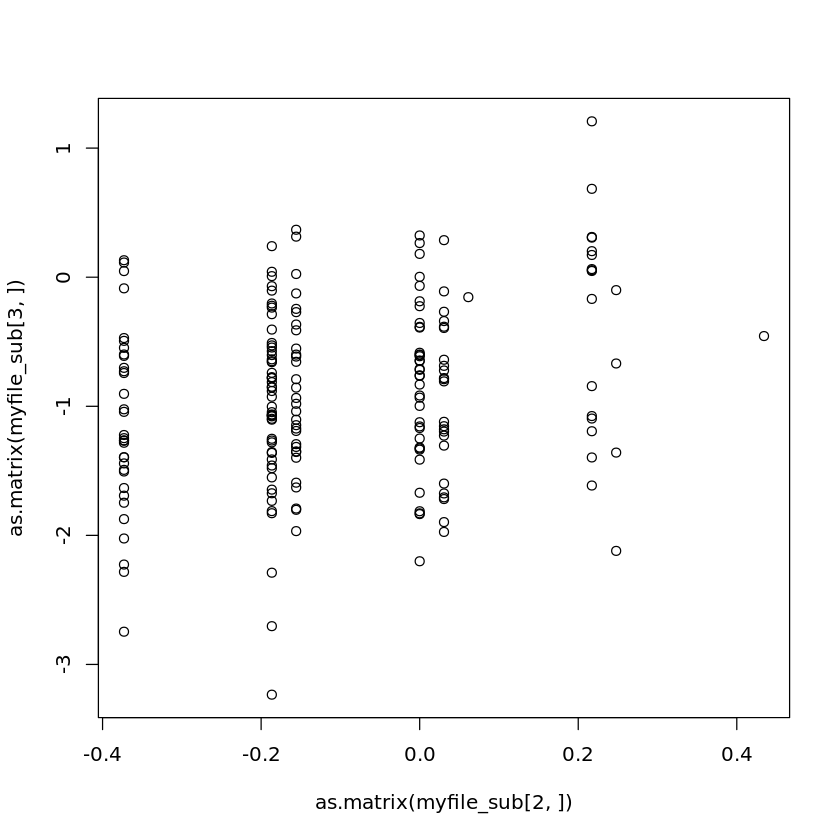

In [23]:
plot(as.matrix(myfile_sub[2,]),as.matrix(myfile_sub[3,]))

In [24]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [25]:
df0 = data.frame(donor_id = colnames(myfile_sub), 
                 PRS0.01 = t(myfile_sub)[,grep("P0.01", rownames(myfile_sub))]#,
#                  PRS0.001 = t(myfile_sub)[,"Alzheimers_disease_2013_24162737_hg19.txt.gz_P0.001"],
#                  PRS1.e4 = t(myfile_sub)[,"Alzheimers_disease_2013_24162737_hg19.txt.gz_P1.0E-4"],
#                  PRS1.e5 = t(myfile_sub)[,"Alzheimers_disease_2013_24162737_hg19.txt.gz_P1.0E-5"],
#                  PRS5.e8 = t(myfile_sub)[,"Alzheimers_disease_2013_24162737_hg19.txt.gz_P1.0E-5"])
                 )
head(df0,2)

,donor_id,PRS0.01
,<chr>,<dbl>
HPSI0114i-bezi_3,HPSI0114i-bezi_3,-12.3171914
HPSI0114i-eipl_1,HPSI0114i-eipl_1,0.7387267


In [30]:
df1 = celltypes[celltypes$treatment == "NONE",] %>% group_by(donor_id) %>% summarise(mean_DA = mean(DA))
# df1 = celltypes[celltypes$treatment == "ROT",] %>% group_by(donor_id) %>% summarise(mean_DA = mean(DA))
head(df1,2)

donor_id,mean_DA
<chr>,<dbl>
HPSI0114i-bezi_3,0.30275229
HPSI0114i-eipl_1,0.01427924


In [31]:
# nrow(df0)
# nrow(df1)
df = inner_join(df0,df1)
# nrow(df)
head(df,2)

Joining, by = "donor_id"


donor_id,PRS0.01,mean_DA
<chr>,<dbl>,<dbl>
HPSI0114i-bezi_3,-12.3171914,0.30275229
HPSI0114i-eipl_1,0.7387267,0.01427924


[1] -0.0008003723

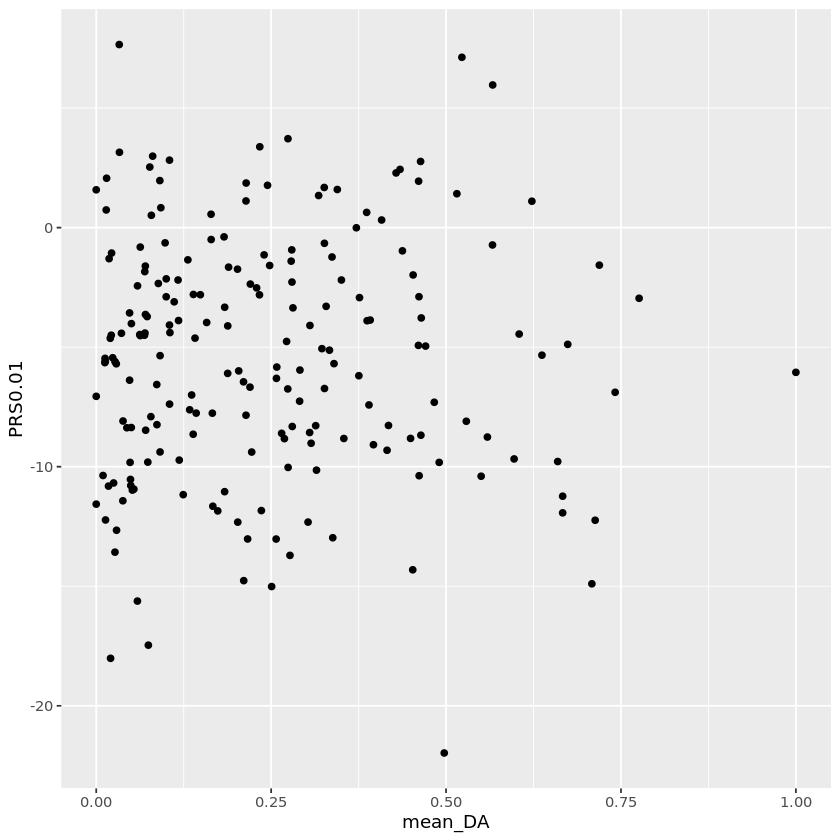

In [32]:
cor(df$mean_DA,df$PRS0.01)
ggplot(df, aes(x = mean_DA, y = PRS0.01)) + geom_point()

In [ ]:
################
## new PRS (PD)
"/hps/nobackup/hipsci/scratch/GWAS_Summary_Stats/SpecificStudies/ChangD_28892059_GCST004902/PD_Risk/"